# Covid 19 Python Exercise (use all your knowledge thus far to solve this)

From Wikipedia,

Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The disease was first identified in 2019 in Wuhan, China, and has since spread globally, resulting in the 2019–20 coronavirus pandemic. Common symptoms include fever, cough and shortness of breath. Muscle pain, sputum production and sore throat are less common. The rate of deaths per number of diagnosed cases is on average 3.4%, ranging from 0.2% in those less than 20 to approximately 15% in those over 80 years old.

Data Source (Date wise) : 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE

Data Source: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

File naming convention

MM-DD-YYYY.csv in UTC.

Field description

Province/State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.
Country/Region: country/region name conforming to WHO (will be updated).
Last Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).
Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)
Deaths: the number of deaths.
Recovered: the number of recovered cases.
Update frequency
Files after Feb 1 (UTC): once a day around 23:59 (UTC).
Files on and before Feb 1 (UTC): the last updated files before 23:59 (UTC).

Q1. Write Python code to display first 5 rows from COVID-19 dataset. Also print the dataset information and check the missing values.

In [5]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-10-2020.csv")
print(df.info())
df.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3262 non-null   float64
 1   Admin2               3267 non-null   object 
 2   Province_State       3793 non-null   object 
 3   Country_Region       3961 non-null   object 
 4   Last_Update          3961 non-null   object 
 5   Lat                  3878 non-null   float64
 6   Long_                3878 non-null   float64
 7   Confirmed            3961 non-null   int64  
 8   Deaths               3961 non-null   int64  
 9   Recovered            3961 non-null   int64  
 10  Active               3957 non-null   float64
 11  Combined_Key         3961 non-null   object 
 12  Incidence_Rate       3874 non-null   float64
 13  Case-Fatality_Ratio  3909 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 433.4+ KB
None


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-10-11 04:23:46,33.93911,67.709953,39703,1475,33064,5166.0,Afghanistan,101.989962,3.710047
1,NaN,NaN,NaN,Albania,2020-10-11 04:23:46,41.15330,20.168300,15231,416,9406,5409.0,Albania,529.258461,2.731272
2,NaN,NaN,NaN,Algeria,2020-10-11 04:23:46,28.03390,1.659600,52940,1795,37170,13975.0,Algeria,120.726889,3.390631
3,NaN,NaN,NaN,Andorra,2020-10-11 04:23:46,42.50630,1.521800,2696,55,1814,827.0,Andorra,3489.290105,2.040059
4,NaN,NaN,NaN,Angola,2020-10-11 04:23:46,-11.20270,17.873900,6246,218,2716,3312.0,Angola,19.004287,3.490234


Q2. Write a Python program to get the latest number of confirmed, deaths, recovered and active cases of Novel Coronavirus (COVID-19) Country wise

In [2]:
new = df[['Confirmed', 'Deaths', 'Recovered', 'Active','Country_Region']]
new.groupby(by='Country_Region').sum()

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Afghanistan,39703,1475,33064,5166.0
Albania,15231,416,9406,5409.0
Algeria,52940,1795,37170,13975.0
Andorra,2696,55,1814,827.0
Angola,6246,218,2716,3312.0
...,...,...,...,...
Vietnam,1107,35,1024,48.0
West Bank and Gaza,43945,378,37240,6327.0
Yemen,2051,595,1329,127.0


Q3. Write a Python program to get the Chinese province wise cases of confirmed, deaths and recovered cases of Novel Coronavirus (COVID-19)

In [3]:
china = df[df['Country_Region'] == 'China']

china = china[['Confirmed', 'Deaths', 'Recovered','Province_State']]
china.groupby(by='Province_State').sum()

,Confirmed,Deaths,Recovered
Province_State,,,
Anhui,991,6,985
Beijing,936,9,927
Chongqing,585,6,578
Fujian,415,1,400
Gansu,170,2,168
Guangdong,1858,8,1823
Guangxi,260,2,256
Guizhou,147,2,145
Hainan,171,6,165


Q4. Write a Python program to get the latest country wise deaths cases of Novel Coronavirus (COVID-19)

In [33]:
dead = df[['Deaths','Country_Region']]

dead.groupby(by='Country_Region').sum()


,Deaths
Country_Region,
Afghanistan,1475
Albania,416
Algeria,1795
Andorra,55
Angola,218
...,...
Vietnam,35
West Bank and Gaza,378
Yemen,595


Q5. Write a Python program to list countries with no cases of Novel Coronavirus (COVID-19) recovered

In [13]:
rec = df[['Recovered','Country_Region']]
rec = rec.groupby(['Country_Region']).sum()
rec[rec["Recovered"]==0]


,Recovered
Country_Region,
MS Zaandam,0
Samoa,0
Serbia,0
Sweden,0


Q6. Write a Python program to get the latest number of confirmed deaths and recovered people of Novel Coronavirus (COVID-19) cases Country/Region - Province/State wise.


In [11]:
df.groupby(['Country_Region','Province_State'])['Deaths', 'Recovered', 'Confirmed'].sum()

<ipython-input-11-43c15ffab40e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Country_Region','Province_State'])['Deaths', 'Recovered', 'Confirmed'].sum()


Deaths  \
Country_Region Province_State                                         
Australia      Australian Capital Territory                       3   
               New South Wales                                   53   
               Northern Territory                                 0   
               Queensland                                         6   
               South Australia                                    4   
...                                                             ...   
United Kingdom Saint Helena, Ascension and Tristan da Cunha       0   
               Scotland                                        2550   
               Turks and Caicos Islands                           6   
               Unknown                                            0   
               Wales                                           1667   

                                                             Recovered  \
Country_Region Province_State                                            
Australia      Australian Capital Territory                        110   
               New South Wales                                       0   
               Northern Territory                                   33   
               Queensland                                         1152   
               South Australia                                     466   
...                                                                ...   
United Kingdom Saint Helena, Ascension and Tristan da Cunha          2   
               Scotland                                              0   
               Turks and Caicos Islands                            672   
               Unknown                                               0   
               Wales                                                 0   

                                                             Confirmed  
Country_Region Province_State                                           
Australia      Australian Capital Territory                        113  
               New South Wales                                    4278  
               Northern Territory                                   33  
               Queensland                                         1161  
               South Australia                                     473  
...                                                                ...  
United Kingdom Saint Helena, Ascension and Tristan da Cunha          2  
               Scotland                                          38042  
               Turks and Caicos Islands                            696  
               Unknown                                               0  
               Wales                                             29654  

[578 rows x 3 columns]

Q7. Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) died

In [15]:
alldie = df[['Confirmed','Country_Region','Deaths']]
alldie = alldie.groupby(['Country_Region']).sum()
alldie = alldie[alldie["Confirmed"]==alldie["Deaths"]]
alldie = alldie[alldie['Confirmed']>0]
alldie

,Confirmed,Deaths
Country_Region,,


Q8.Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) recovered.

In [16]:
allrec = df[['Confirmed','Country_Region','Recovered']]
allrec = allrec.groupby(['Country_Region']).sum()
allrec = allrec[allrec["Confirmed"]==allrec["Recovered"]]
allrec = allrec[allrec['Confirmed']>0]
allrec

,Confirmed,Recovered
Country_Region,,
Grenada,24,24
Holy See,12,12
Saint Vincent and the Grenadines,64,64
Timor-Leste,28,28


Q9. Write a Python program to get the top 10 countries data (Last Update, Country/Region, Confirmed, Deaths, Recovered) of Novel Coronavirus (COVID-19).

In [20]:
top = df[['Confirmed', 'Deaths', 'Recovered', 'Last_Update','Country_Region']]
top = top.groupby(['Country_Region']).sum().sort_values(by='Confirmed', ascending=False).head(10)
top['Last Update'] = "2020-10-11 04:23:46"
top

,Confirmed,Deaths,Recovered,Last Update
Country_Region,,,,
US,7749069,214596,3062983,2020-10-11 04:23:46
India,7053806,108334,6077976,2020-10-11 04:23:46
Brazil,5082637,150198,4502854,2020-10-11 04:23:46
Russia,1278245,22331,1011911,2020-10-11 04:23:46
Colombia,902747,27660,783131,2020-10-11 04:23:46
Argentina,883882,23581,709464,2020-10-11 04:23:46
Spain,861112,32929,150376,2020-10-11 04:23:46
Peru,846088,33223,733000,2020-10-11 04:23:46
Mexico,814328,83642,689377,2020-10-11 04:23:46


Q10. Write a Python program to create a plot (bar) of total deaths, confirmed, recovered and active cases Country wise where deaths greater than 150.

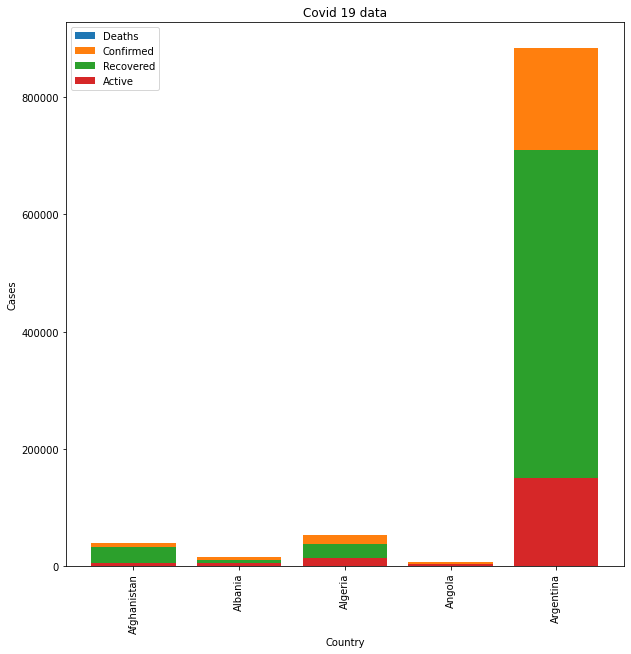

In [29]:
import matplotlib.pyplot as plt
import matplotlib
high = df.groupby(['Country_Region']).sum()
high = high[high['Deaths'] > 150].head(5)
fig, ax = plt.subplots(figsize=(10,10))
dea = ax.bar(high.index, high['Deaths'], label="Deaths")
con = ax.bar(high.index, high['Confirmed'], label="Confirmed")
rec = ax.bar(high.index, high['Recovered'], label="Recovered")
act = ax.bar(high.index, high['Active'], label="Active")
ax.legend(loc=2)
plt.xticks(rotation=90)
ax.set_xlabel('Country')
ax.set_ylabel('Cases')
ax.set_title('Covid 19 data')
plt.show()

Q.11  Write a Python program to visualize the state/province wise death cases of Novel Coronavirus (COVID-19) in USA

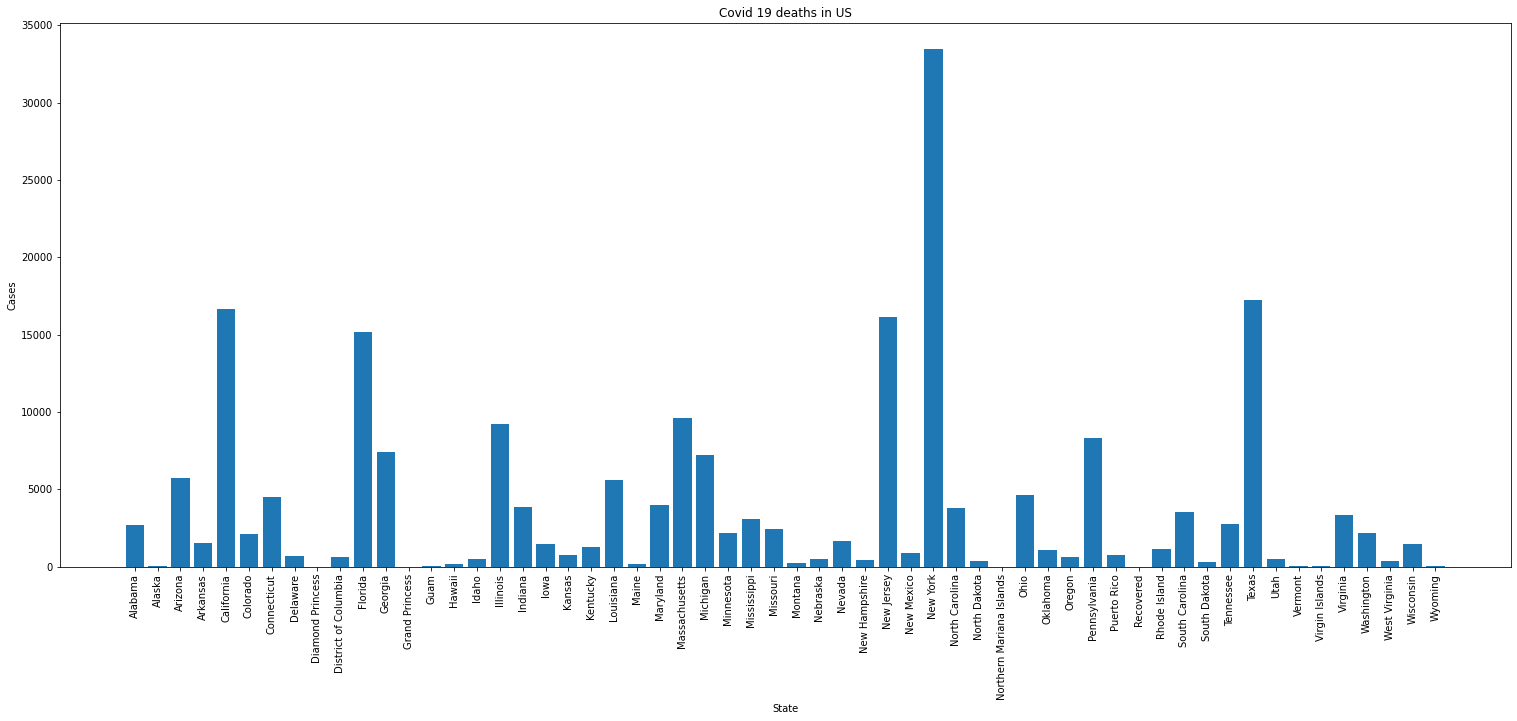

In [31]:
us = df[df['Country_Region'] == 'US']

us = us[['Deaths','Province_State']]
us = us.groupby(by='Province_State').sum()
fig, ax = plt.subplots(figsize=(26,10))
ax.bar(us.index, us['Deaths'])
plt.xticks(rotation=90)
ax.set_xlabel('State')
ax.set_ylabel('Cases')
ax.set_title('Covid 19 deaths in US')
plt.show()

Q.12 Write a Python program to visualize the state/province wise Active cases of Novel Coronavirus (COVID-19) in USA

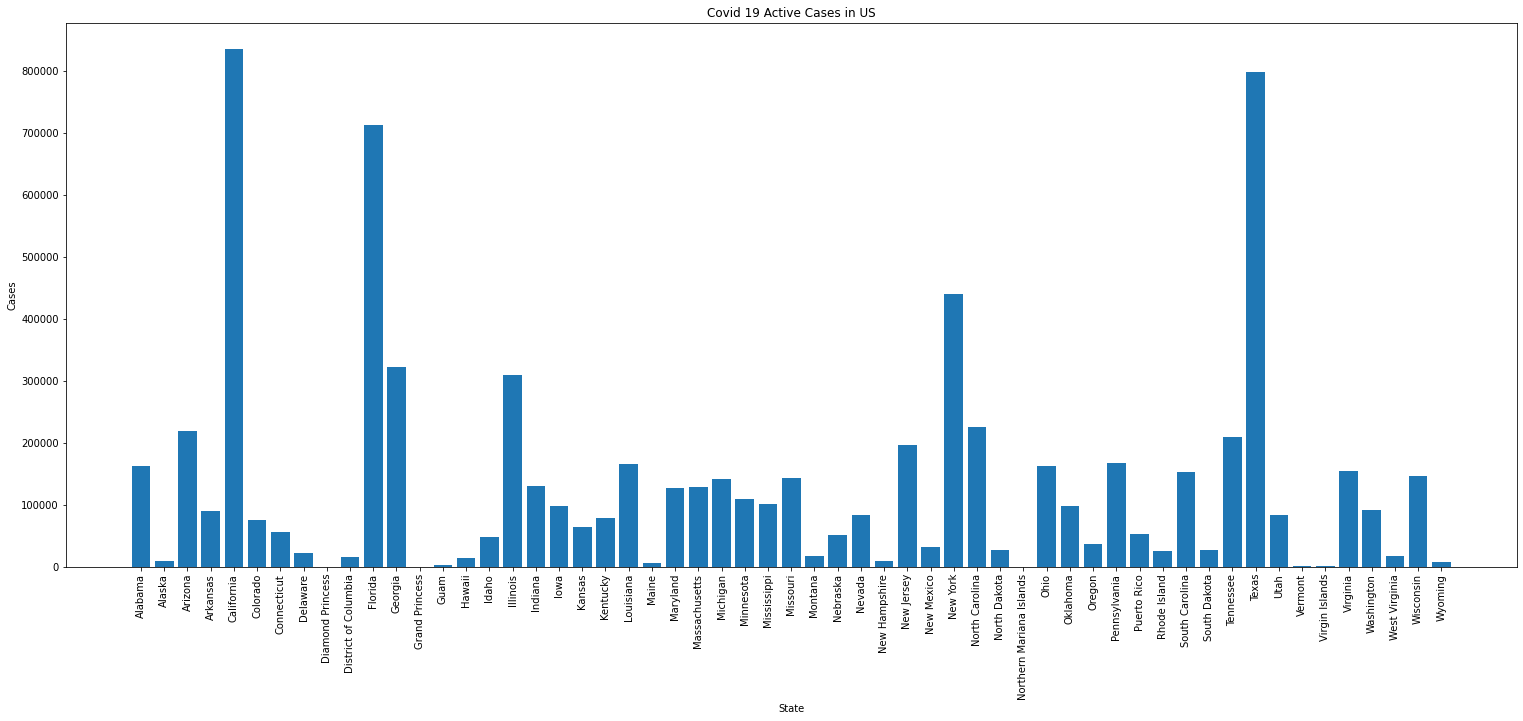

In [36]:
us = df[df['Country_Region'] == 'US']

us = us[['Active','Province_State']]
us = us.groupby(by='Province_State').sum()
us.drop('Recovered',inplace=True)
fig, ax = plt.subplots(figsize=(26,10))
ax.bar(us.index, us['Active'])
plt.xticks(rotation=90)
ax.set_xlabel('State')
ax.set_ylabel('Cases')
ax.set_title('Covid 19 Active Cases in US')
plt.show()

Q.13 Write a Python program to visualize the state/province wise combine number of confirmed, deaths, recovered, active Novel Coronavirus (COVID-19) cases in USA.

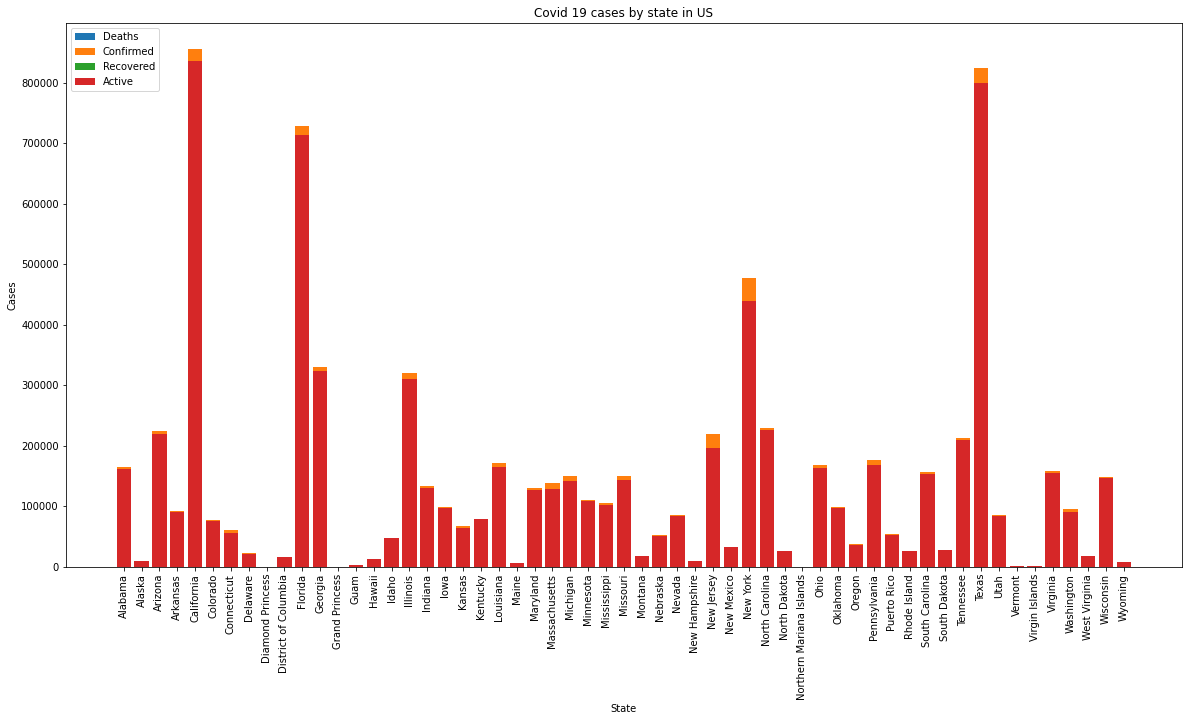

In [40]:
import matplotlib.pyplot as plt
import matplotlib
high = df[df['Country_Region'] == "US"]
high = high.groupby(['Province_State']).sum()
high.drop('Recovered', inplace=True)
fig, ax = plt.subplots(figsize=(20,10))
dea = ax.bar(high.index, high['Deaths'], label="Deaths")
con = ax.bar(high.index, high['Confirmed'], label="Confirmed")
rec = ax.bar(high.index, high['Recovered'], label="Recovered")
act = ax.bar(high.index, high['Active'], label="Active")
ax.legend(loc=2)
plt.xticks(rotation=90)
ax.set_xlabel('State')
ax.set_ylabel('Cases')
ax.set_title('Covid 19 cases by state in US')
plt.show()

Q.14 Write a Python program to visualize Worldwide Confirmed Novel Coronavirus (COVID-19) cases over time

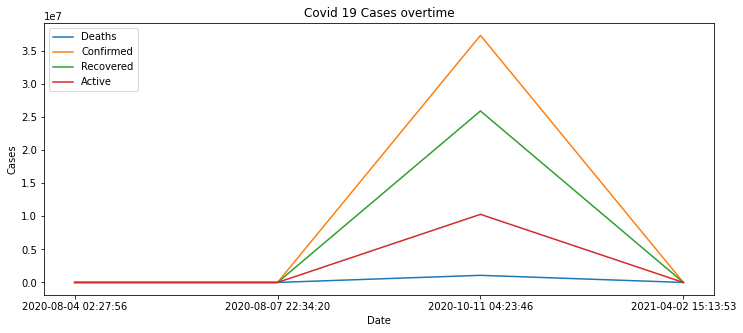

In [34]:
world = df[['Deaths','Confirmed', 'Recovered', 'Active','Last_Update']]
world = world.groupby(['Last_Update']).sum()
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(world.index, world['Deaths'], label="Deaths")
ax.plot(world.index, world['Confirmed'], label="Confirmed")
ax.plot(world.index, world['Recovered'], label="Recovered")
ax.plot(world.index, world['Active'], label="Active")
ax.legend(loc=2)
ax.set_xlabel('Date')
ax.set_ylabel('Cases')
ax.set_title('Covid 19 Cases overtime')
plt.show()